In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import IPython
import librosa
import librosa.display

from surfboard.sound import Waveform

In [51]:
findPhone = ["d", "a"]
f1s = []
f2s = []
print("findPhone : " + str(findPhone))
for index in range(1, 503):
    # Path set
    loadnumber = str(index)
    Path = "/mnt/d/Document/Resarch/corpus/MHT8kHz/MHT8kHz/"
    wavname = Path + "WAV8kHz/" + loadnumber + ".wav"
    labname = Path + "Julius_label/" + loadnumber + ".lab"
    # load wav file
    sr = 8000
    y, sr = librosa.load(wavname, sr=sr, mono=True)
    # load lab file
    label_ori = open(labname, 'r')
    label_list = label_ori.readlines()
    label_ori.close()
    label_list = list(map(lambda x:x.strip(),label_list))
    # label separate
    labels = []     # labels[[iterator][[開始時間(sec),終了時間(sec),音韻]]
    for phoneme in label_list:
        label = phoneme.split(' ')
        labels.append(label)
    # Foumant 
    for iterator in range(len(labels)):
        if labels[iterator][2] == "silB" or labels[iterator][2] == "sp":
            if labels[iterator+1][2] ==  findPhone[0]:
                if labels[iterator+2][2] ==  findPhone[1]:
                    print("===================================")
                    print("load_waveFile_index : " + loadnumber)
                    offset = float(labels[iterator+1][0])
                    duration = (float(labels[iterator+1][1]) - float(labels[iterator+1][0]))/4
                    end = float(labels[iterator+1][1]) - duration
                    y_a, sr_a = \
                        librosa.load(wavname, sr=sr, mono=True, offset=offset,duration=duration)
                    y_b, sr_b = \
                        librosa.load(wavname, sr=sr, mono=True, offset=end, duration=duration)
                    try:
                        wave_y_a = Waveform(signal=y_a, sample_rate=sr_a)
                        wave_y_b = Waveform(signal=y_b, sample_rate=sr_b)
                        formants_y_a = wave_y_a.formants()
                        formants_y_b = wave_y_b.formants()
                        # print(str(offset) +" ~ "+ str(duration) +" ~ "+ str(offset+duration))
                        # print(str(end) +" ~ "+ str(duration) +" ~ "+ str(end+duration))
                        print("Phone: "+findPhone[0])
                        print(formants_y_a)
                        print(formants_y_b)
                        offset_2 = float(labels[iterator+2][0])
                        duration_2 = (float(labels[iterator+2][1]) - \
                                                float(labels[iterator+2][0]))/3
                        y_c, sr_c = \
                        librosa.load(wavname, \
                                sr=sr, mono=True, offset=offset_2+duration_2,\
                                                    duration=duration_2)
                        wave_y_c = Waveform(signal=y_c, sample_rate=sr_c)
                        formants_y_c = wave_y_c.formants()
                        print("Phone: "+findPhone[1])
                        print(formants_y_c)
                        f1 = []
                        f1.append(formants_y_a['f1'])
                        f1.append(formants_y_b['f1'])
                        f1.append(formants_y_c['f1'])
                        f1s.append(f1)
                        f2 = []
                        f2.append(formants_y_a['f2'])
                        f2.append(formants_y_b['f2'])
                        f2.append(formants_y_c['f2'])
                        f2s.append(f2)
                    except:
                        print("!not found Foumants!")
                        pass

findPhone : ['d', 'a']
load_waveFile_index : 15
Phone: d
{'f1': 1268.431636061094, 'f2': 2655.855694483559}
{'f1': 548.889342166873, 'f2': 1423.2491032988999}
Phone: a
{'f1': 662.1850034809801, 'f2': 1376.2800216201726}
load_waveFile_index : 32
Phone: d
{'f1': 1795.2378895394068, 'f2': 2792.281664523407}
{'f1': 555.0020317504072, 'f2': 1562.2064756516731}
Phone: a
{'f1': 1296.4151781122487, 'f2': 2529.399425239303}
load_waveFile_index : 37
Phone: d
{'f1': 262.4656433381816, 'f2': 1341.6079260602933}
{'f1': 571.574186238428, 'f2': 1491.9618710602736}
Phone: a
{'f1': 1487.2552562871776, 'f2': 2374.951455942833}
load_waveFile_index : 158
Phone: d
{'f1': 1594.959339372971, 'f2': 2653.052857471151}
{'f1': 519.7520179263196, 'f2': 1612.1916026332185}
Phone: a
{'f1': 1505.1176488758938, 'f2': 2429.1417297257926}
load_waveFile_index : 201
Phone: d
{'f1': 1289.205144514183, 'f2': 2736.0321980265794}
{'f1': 1459.2425570529651, 'f2': 2662.661351797097}
Phone: a
{'f1': 1450.699550480502, 'f2': 246

(0.0, 3500.0)

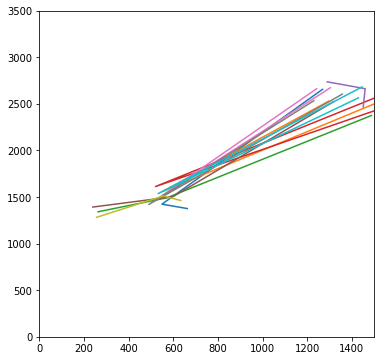

In [52]:
plt.figure(figsize=(6, 6))
# plt.plot(f1s[20][:],f2s[20][:])
for f1, f2 in zip(f1s, f2s):
    plt.plot(f1, f2)
plt.xlim((0, 1500))
plt.ylim((0, 3500))